# Problem Statement -- Credit card Default Status 

# Predictive Modeling -- Linear Discremenant Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.rc("font", size = 14)

import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [2]:
data_df = pd.read_csv("default.csv")

In [3]:
data_df.head(11)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2
5,Female,1,Management,12,86,3.6,No,critical,1,personal,4
6,Female,1,Management,15,86,3.6,No,critical,1,personal,4
7,Male,1,skilled,12,85,3.6,No,poor,1,personal,2
8,Male,1,skilled,13,87,3.9,No,critical,1,personal,2
9,Male,1,skilled,13,89,4.0,No,critical,1,personal,0


In [4]:
## The variable in which i aam interested in is the default STATUS 

In [5]:
data_df.tail(21)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
760,Male,1,Management,0,43,13.9,Default,good,0,car,1
761,Male,1,Management,0,43,14.0,Default,good,0,car,1
762,Male,1,Management,2,47,14.0,Default,verygood,0,car,1
763,Female,1,skilled,5,58,14.0,Default,critical,0,personal,0
764,Female,1,skilled,6,58,14.0,Default,critical,0,personal,0
765,Male,1,skilled,1,42,14.0,Default,critical,0,consumer.durable,0
766,Male,1,skilled,4,47,14.0,Default,critical,0,consumer.durable,0
767,Male,1,skilled,3,47,14.2,Default,critical,0,consumer.durable,0
768,Male,1,skilled,1,42,14.2,Default,critical,0,consumer.durable,0
769,Male,1,skilled,4,52,14.3,Default,good,0,car,0


In [6]:
data_df.shape

(781, 11)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          781 non-null    object 
 1   Loan.Offered    781 non-null    int64  
 2   Job             781 non-null    object 
 3   Work.Exp        781 non-null    int64  
 4   Credit.Score    781 non-null    int64  
 5   EMI.Ratio       781 non-null    float64
 6   Status          781 non-null    object 
 7   Credit.History  781 non-null    object 
 8   Own house       781 non-null    int64  
 9   Purpose         781 non-null    object 
 10  Dependents      781 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 67.2+ KB


In [8]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan.Offered,781.0,0.756722,0.429336,0.0,1.0,1.0,1.0,1.0
Work.Exp,781.0,12.377721,3.809161,0.0,11.0,13.0,15.0,19.0
Credit.Score,781.0,83.597951,12.040410,42.0,83.0,87.0,91.0,99.0
EMI.Ratio,781.0,9.495006,2.786867,3.0,7.4,9.5,11.4,15.0
Own house,781.0,0.768246,0.422223,0.0,1.0,1.0,1.0,1.0
Dependents,781.0,2.081946,1.068641,0.0,2.0,2.0,3.0,4.0


In [9]:
data_df.isnull().sum()

Gender            0
Loan.Offered      0
Job               0
Work.Exp          0
Credit.Score      0
EMI.Ratio         0
Status            0
Credit.History    0
Own house         0
Purpose           0
Dependents        0
dtype: int64

## Converting data_df["Own house"] -- > Object

In [10]:
data_df["Own house"] = data_df["Own house"].astype(object)

In [11]:
data_df["Own house"]

0      1
1      1
2      1
3      1
4      1
      ..
776    0
777    0
778    0
779    0
780    0
Name: Own house, Length: 781, dtype: object

## Find out unique values in each categorical column 

In [12]:
data_df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
data_df["Job"].unique()

array(['unskilled', 'skilled', 'Management'], dtype=object)

In [14]:
data_df["Status"].unique()

array(['No', 'Default'], dtype=object)

In [15]:
data_df["Credit.History"].unique()

array(['poor', 'critical', 'good', 'very good', 'verygood', 'Poor'],
      dtype=object)

In [16]:
data_df["Own house"].unique()

array([1, 0], dtype=object)

In [17]:
data_df["Purpose"].unique()

array(['personal', 'car', 'education', 'consumer.durable'], dtype=object)

In [18]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house          object
Purpose            object
Dependents          int64
dtype: object

## clean the dataset -- correction in values

In [19]:
data_df["Credit.History"] = np.where(data_df["Credit.History"] == "very good", "verygood", data_df["Credit.History"]) 

In [20]:
data_df["Credit.History"] = np.where(data_df["Credit.History"] == "Poor", "poor", data_df["Credit.History"])

In [21]:
data_df["Credit.History"].unique()

array(['poor', 'critical', 'good', 'verygood'], dtype=object)

## Count of Default and No-Default in target column

In [22]:
data_df["Status"].value_counts()

No         656
Default    125
Name: Status, dtype: int64

## Univariate Plots 

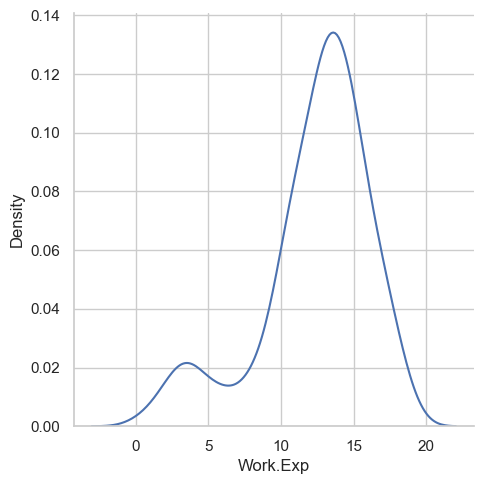

In [23]:
sns.displot(data_df["Work.Exp"], kind = "kde")
plt.show();

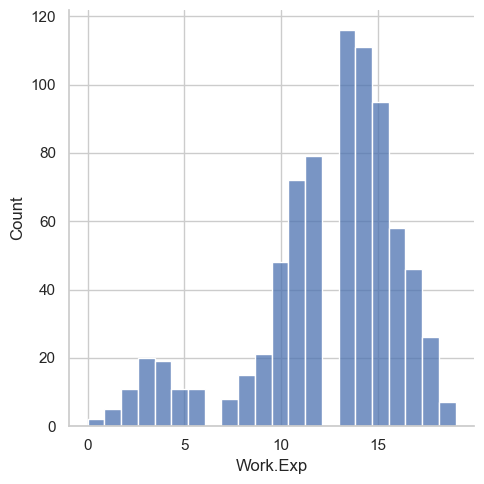

In [24]:
sns.displot(data_df["Work.Exp"])
plt.show();

## Bivariate Analysis

Bivariate shown below is only as a sample 

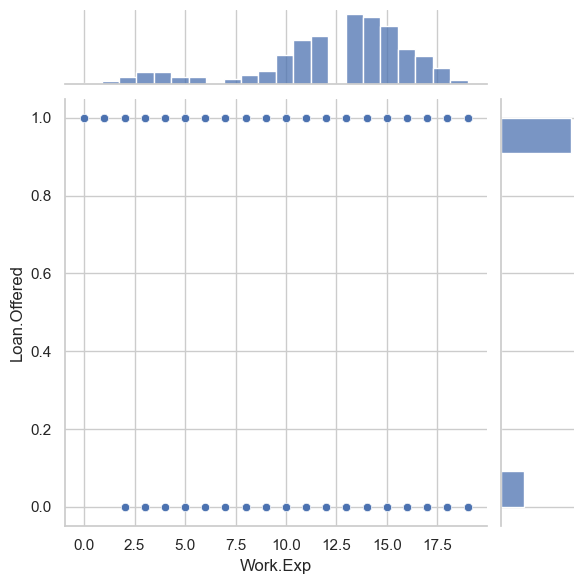

In [25]:
sns.jointplot(x = data_df["Work.Exp"], y= data_df["Loan.Offered"]);

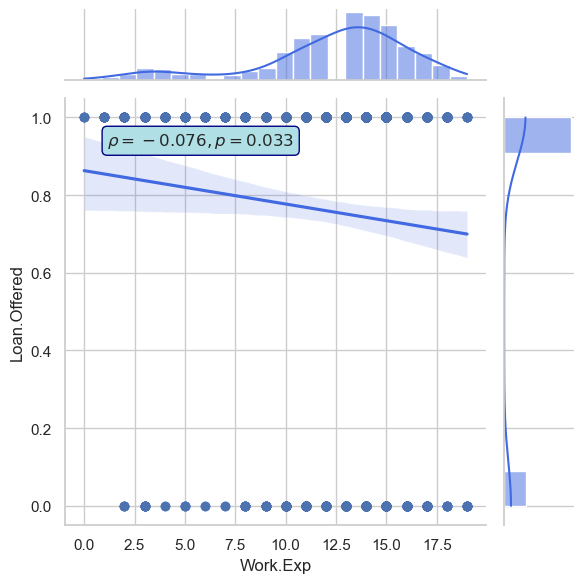

In [26]:
# # a = data_df["Work.Exp"]
# # b = data_df["Loan.Offered"]

# # kind='reg',color='royalblue'

# ax = sns.jointplot(data_df["Work.Exp"], data_df["Loan.Offered"], kind='reg',color='royalblue')
# #ax.annotate(stats.pearsonr)
# ax.ax_joint.scatter(a,b)
# ax.set_axis_labels(xlabel='a', ylabel='b', size=15)
# plt.tight_layout()
# plt.show()


a = data_df["Work.Exp"]
b = data_df["Loan.Offered"]



g = sns.jointplot(x=a, y=b, kind='reg', color='royalblue')
# ax.annotate(stats.pearsonr)
r, p = stats.pearsonr(a, b)
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
g.ax_joint.scatter(a, b)
# g.set_axis_labels(xlabel='a', ylabel='b', size=15)
plt.tight_layout()
plt.show()


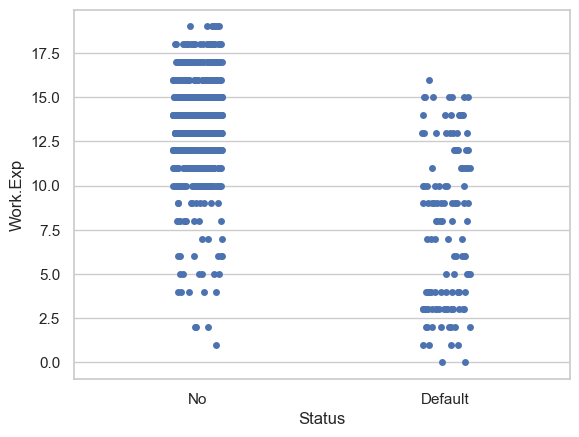

In [27]:
sns.stripplot(x = data_df["Status"], y = data_df["Work.Exp"]);

Lower Work Experience have more concentration of Default 

## Find the distribution of depandent variable categories

In [28]:
count_no_sub = len(data_df[data_df["Status"] == "No"])
count_sub = len(data_df[data_df["Status"] == "Default"])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no Default is :", pct_of_no_sub * 100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of Default is :", pct_of_sub * 100)

Percentage of no Default is : 83.99487836107554
Percentage of Default is : 16.005121638924454


Distribution is not biased and hence no need to use SMOTE or any other package to balance binary classes

Text(0, 0.5, 'Status')

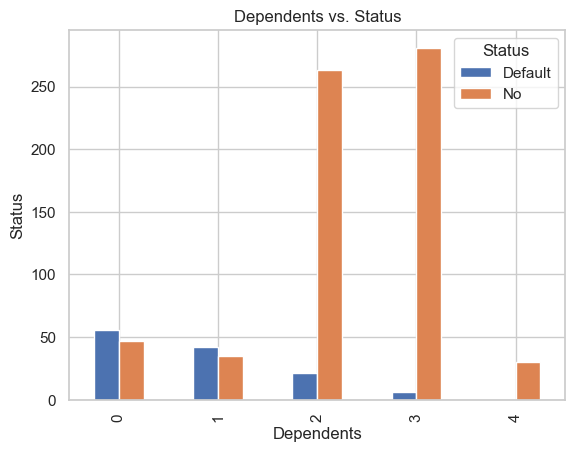

In [29]:
pd.crosstab(data_df.Dependents, data_df.Status).plot(kind = "bar");
plt.title("Dependents vs. Status")
plt.xlabel("Dependents")
plt.ylabel("Status")

## Convert object feature types for Linear Discriminant Analysis

In [30]:
data_df["Gender"] = np.where(data_df["Gender"] == "Male", "1", data_df["Gender"]) 
data_df["Gender"] = np.where(data_df["Gender"] == "Female", "0", data_df["Gender"]) 

In [31]:
data_df["Job"] = np.where(data_df["Job"] == "Management", "2", data_df["Job"])
data_df["Job"] = np.where(data_df["Job"] == "unskilled", "0", data_df["Job"])
data_df["Job"] = np.where(data_df["Job"] == "skilled", "1", data_df["Job"])

In [32]:
data_df["Credit.History"] = np.where(data_df["Credit.History"] == "critical", "0", data_df["Credit.History"]) 
data_df["Credit.History"] = np.where(data_df["Credit.History"] == "poor", "1", data_df["Credit.History"]) 
data_df["Credit.History"] = np.where(data_df["Credit.History"] == "good", "2", data_df["Credit.History"]) 
data_df["Credit.History"] = np.where(data_df["Credit.History"] == "verygood", "3", data_df["Credit.History"]) 

In [57]:
data_df["Purpose"] = np.where(data_df["Purpose"] == "personal", "1", data_df["Purpose"])
data_df["Purpose"] = np.where(data_df["Purpose"] == "car", "0", data_df["Purpose"])
data_df["Purpose"] = np.where(data_df["Purpose"] == "education", "2", data_df["Purpose"])
data_df["Purpose"] = np.where(data_df["Purpose"] == "consumer.durable" , "3", data_df["Purpose"])

In [59]:
data_df.head(11)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
0,1,0,0,14,86,3.0,No,1,1,1,2
1,0,1,1,15,94,3.0,No,1,1,1,3
2,1,0,0,16,86,3.0,No,1,1,1,2
3,0,1,1,13,94,3.0,No,1,1,1,3
4,1,1,1,12,85,3.3,No,1,1,1,2
5,0,1,2,12,86,3.6,No,0,1,1,4
6,0,1,2,15,86,3.6,No,0,1,1,4
7,1,1,1,12,85,3.6,No,1,1,1,2
8,1,1,1,13,87,3.9,No,0,1,1,2
9,1,1,1,13,89,4.0,No,0,1,1,0


In [61]:
data_df.tail(21)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
760,1,1,2,0,43,13.9,Default,2,0,0,1
761,1,1,2,0,43,14.0,Default,2,0,0,1
762,1,1,2,2,47,14.0,Default,3,0,0,1
763,0,1,1,5,58,14.0,Default,0,0,1,0
764,0,1,1,6,58,14.0,Default,0,0,1,0
765,1,1,1,1,42,14.0,Default,0,0,3,0
766,1,1,1,4,47,14.0,Default,0,0,3,0
767,1,1,1,3,47,14.2,Default,0,0,3,0
768,1,1,1,1,42,14.2,Default,0,0,3,0
769,1,1,1,4,52,14.3,Default,2,0,0,0


In [62]:
data_df.iloc[:,9]

0      1
1      1
2      1
3      1
4      1
      ..
776    3
777    0
778    0
779    0
780    0
Name: Purpose, Length: 781, dtype: object

In [56]:
# data_df.iloc[:,9]

0                     1
1                     1
2                     1
3                     1
4                     1
             ...       
776    consumer.durable
777                   0
778                   0
779                   0
780                   0
Name: Purpose, Length: 781, dtype: object

In [35]:
data_df.columns

Index(['Gender', 'Loan.Offered', 'Job', 'Work.Exp', 'Credit.Score',
       'EMI.Ratio', 'Status', 'Credit.History', 'Own house', 'Purpose',
       'Dependents'],
      dtype='object')

## Prepare data and scale it 

In [81]:
X = np.asarray(data_df[['Gender', 'Loan.Offered', 'Job', 'Work.Exp', 'Credit.Score', 'EMI.Ratio', 'Credit.History', 'Own house', 'Purpose', 'Dependents']])
X = scale(X)

y = np.asarray(data_df["Status"])

## Build LDA Model 


In [82]:
clf = LinearDiscriminantAnalysis()
model = clf.fit(X, y)
model

LinearDiscriminantAnalysis()

In [83]:
## Predict Class

pred_class = model.predict(X)
data_df["Prediction"] = pred_class

In [85]:
## Check corelation values 

data = data_df[['Gender', 'Loan.Offered', 'Job', 'Work.Exp', 'Credit.Score', 'EMI.Ratio', 'Credit.History', 'Own house', 'Purpose', 'Dependents']]
cor1 = data.corr()
cor1

C:\Users\abhin\AppData\Local\Temp\ipykernel_9724\3598823674.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor1 = data.corr()


,Loan.Offered,Work.Exp,Credit.Score,EMI.Ratio,Dependents
Loan.Offered,1.000000,-0.076224,-0.082435,0.057273,-0.029145
Work.Exp,-0.076224,1.000000,0.915575,-0.300286,0.408753
Credit.Score,-0.082435,0.915575,1.000000,-0.382192,0.490798
EMI.Ratio,0.057273,-0.300286,-0.382192,1.000000,-0.251782
Dependents,-0.029145,0.408753,0.490798,-0.251782,1.000000


In [86]:
## Generate confusion Matrix

confusion_matrix(y, pred_class)

array([[124,   1],
       [ 17, 639]], dtype=int64)

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

     Default       0.88      0.99      0.93       125
          No       1.00      0.97      0.99       656

    accuracy                           0.98       781
   macro avg       0.94      0.98      0.96       781
weighted avg       0.98      0.98      0.98       781

